In [ ]:
import scipy
import matplotlib.pyplot as plt
import numpy as np
import nest


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.5
 Built: Jul 13 2023 04:45:54

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



In [26]:
nest.set_verbosity("M_WARNING")
nest.ResetKernel()

In [27]:
#sine_source = nest.Create("ac_generator")
#sine_source.set({"amplitude": 376.0, "frequency": 10.0, "phase": 90.0, "offset": 100.0})
#sine_source.get()
#nest.Connect(sine_source, neuron)

In [28]:
weight_high_bound = whb = 275.0
weight_low_bound = wlb = 175.0
first_layer_weights = (whb - wlb) * np.random.random_sample(5*10) + wlb
first_layer_weights = first_layer_weights.reshape(10,5)

second_layer_weights = (whb - wlb) * np.random.random_sample(10*10) + wlb
second_layer_weights = second_layer_weights.reshape(10,10)

In [29]:
first_layer = nest.Create("iaf_psc_alpha", 5, params={"I_e": [520.0, 490.0, 460.0, 430.0, 400.0]} )
second_layer = nest.Create('iaf_psc_alpha', 10)
third_layer = nest.Create("iaf_psc_alpha", 10)

nest.Connect(first_layer, second_layer, {'rule': 'fixed_indegree', 'indegree': 5}, 
             syn_spec={"weight":first_layer_weights})
nest.Connect(second_layer, third_layer, {'rule': 'fixed_indegree', 'indegree': 10}, 
             syn_spec={"weight":second_layer_weights})

first_layer_mult = nest.Create("multimeter")
first_layer_spike_recorder = nest.Create("spike_recorder")
first_layer_mult.set(record_from=["V_m"])
nest.Connect(first_layer_mult, first_layer)
nest.Connect(first_layer, first_layer_spike_recorder)

second_layer_mult = nest.Create("multimeter")
second_layer_spike_recorder = nest.Create("spike_recorder")
second_layer_mult.set(record_from=["V_m"])
nest.Connect(second_layer_mult, second_layer)
nest.Connect(second_layer, second_layer_spike_recorder)

third_layer_mult = nest.Create("multimeter")
third_layer_spike_recorder = nest.Create("spike_recorder")
third_layer_mult.set(record_from=["V_m"])
nest.Connect(third_layer_mult, third_layer)
nest.Connect(third_layer, third_layer_spike_recorder)

In [34]:
records = {}
for iii in range(5):
    nest.Reset()
    nest.Simulate(1500.0)
    first_layer_weights[0] = first_layer_weights[0]+iii*20
    spike_recorder = second_layer_spike_recorder
    spike_times, spikes = spike_recorder.get("events")["times"], spike_recorder.get("events")["senders"]
    records[iii] = [spike_times, spikes]

AttributeError: module 'nest' has no attribute 'Reset'

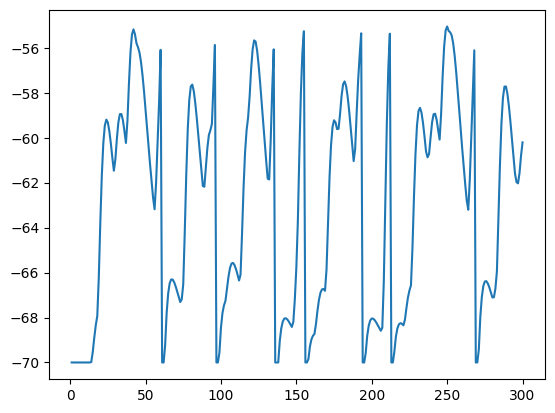

In [7]:
multimeter = second_layer_mult
spike_recorder = second_layer_spike_recorder

multimeter_times, voltage_trace = multimeter.get()["events"]["times"], multimeter.get()["events"]["V_m"]

spike_times, spikes = spike_recorder.get("events")["times"], spike_recorder.get("events")["senders"]

plt.figure(1);
plt.plot(multimeter_times[7::10][:300], voltage_trace[7::10][:300])
plt.show()

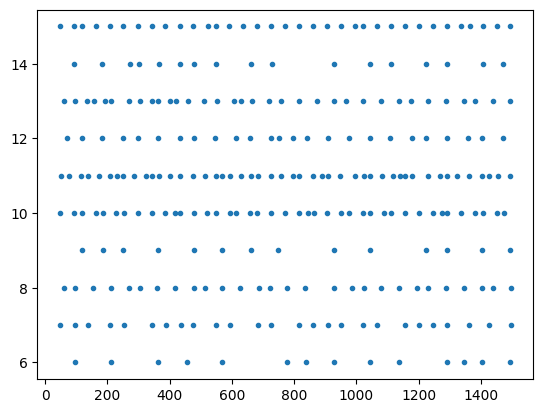

In [8]:
plt.figure(2); 
plt.plot(spike_times, spikes, ".")
plt.show()

In [23]:
temp = spikes[spikes == (6 or 7 or 8 or 9)]
t = spike_times[spikes == (6 or 7 or 8 or 9)]

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

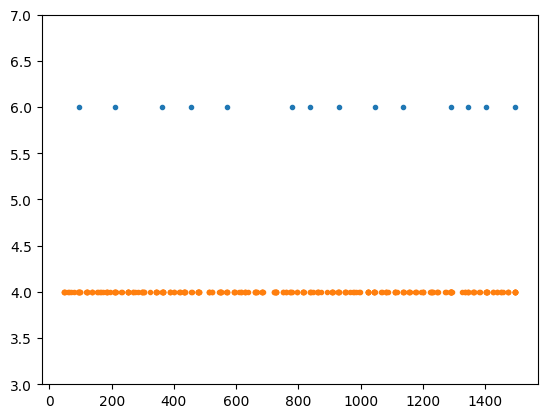

In [22]:
plt.plot(t,temp, ".")
plt.plot(spike_times, [4]*len(spike_times), ".")
plt.ylim([3,7])
plt.show()